
### Projeto de Computação Eficiente

____

### Introdução

O objetivo deste projeto é verificar os tempos de execução e a eficiência do uso de memória dos códigos ao analisar os dados públicos de vacinação da COVID-19. 


**Parte 1: Download dos arquivos**\
        Realização do scrapping da página do Opensus e feito o download dos arquivos para os estados AM, AL, AC e AP.
                 
**Parte 2: Descrição dos Dados**\
        Exploração do primeiro arquivo para entender quais dados estão disponíveis

**Parte 3: Carregamento dos Dados**\
        Comparação de eficiência ao carregar os arquivos para memória

**Parte 4: Manipulação dos Dados**\
        Comparação de eficiência ao fazer manipulações nos dados

**Parte 5: Visualização**\
        Visualização da análise realizada

obs:
Todos os códigos foram rodados num computador com SSD e  16gb de RAM.


_____

### Parte 1: Web Scrapping

Neste parte, foi utilizada duas funções. A primeira coleta os endereços dos arquivos na página do Opensus e a segunda baixa o arquivo utilizando recursos para limitar o uso da memória, podendo ser usada sem preocupação para baixar arquivos grandes.

In [7]:
#Primeira Função
from bs4 import BeautifulSoup
import requests

def links_on_page(url: iter, file: str, filter = None):
    """
    Procura links em uma url
    
    file: se especificado, procura por extensão
    filter: filtra palavras no link ou arquivo

    Retorna lista com texto dos links, nome do arquivo e endereço
    Se a página está com problema, retorna None
    """
    retorno = []

    for i in url:
        resposta = requests.get(i)
        if resposta.status_code == 200:
            soup = BeautifulSoup(resposta.text)
            ret = [(link.text,link['href'].split('/')[-1],link['href']) for link in soup.find_all('a') if 'http' in link['href'] and '.'+file in link['href']]

            if filter is not None:
                retorno.extend([i for i in ret if any(f in i[0] or f in i[1] for f in filter)])
            else:
                retorno.extend(ret)

        else:
            print('Erro na página:',i, resposta.status_code)
            return None

    return retorno

In [5]:
#Link da página do Opensus
ref1 = 'https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/5093679f-12c3-4d6b-b7bd-07694de54173?inner_span=True'
ref2 = 'https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/10aed154-04c8-4cf4-b78a-8f0fa1bc5af4?inner_span=True'

#Coletando os endereços dos arquivos csv dos estados AC, AP, AL e AM
arquivos= links_on_page([ref1, ref2], 'csv')

In [10]:
#Segunda Função
import gzip
import os
def colect_and_save_files(url: str, file_name = None, folder = None, chunck = 9000, compress = False):
    """
    Função que faz download de arquivo de um link
    
    file_name, folder: Pode mudar o nome do arquivo e/ou folder
    chunck: Especifica um máximo de memória para ser utilizado (chunck)
    compress : Pode compremir o arquivo ao baixar
    """
   
    #Nome do arquivo e localização
    if (file_name is not None) and (folder is not None): 
        os.makedirs(folder, exist_ok=True)
        name = folder + '/' + file_name + '.' + url.split('.')[-1]
    elif file_name is not None:
        name = file_name + '.'+ url.split('.')[-1]
    elif folder is not None:
        os.makedirs(folder, exist_ok=True)
        name = folder+'/'+url.split('/')[-1]
    else:
        name = url.split('/')[-1]

    
    with requests.get(url, stream=True) as req:
        req.raise_for_status()

        if compress == True:
            with gzip.open(name+'.gz', 'wb') as f:
                for piece in req.iter_content(chunk_size = chunck):
                    f.write(piece)
        else:
            with open(name, 'wb') as f:
                for piece in req.iter_content(chunk_size = chunck):
                    f.write(piece)

In [11]:
resposta = requests.get(arquivos[0][2])

In [ ]:
import pandas as pd

ss = pd.read_csv(arquivos[0][2], sep=';')

In [13]:
ss.head()

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,54643b9f-e42c-4d8e-9f4e-29942b155b44-i0b0,d39126f9f650b946d23174e025b08e437e1b6d61ae9a83...,6,2015-06-13,F,3,PARDA,120020.0,10.0,CRUZEIRO DO SUL,...,NaN,NaN,B202106081,Pendente Identificação,Organization/29501,2022-03-28,1ª Dose,98,COVID-19 SINOVAC - CORONAVAC,Novo PNI
1,5cdd5bc0-d2a9-4757-8266-f8d90fb21ea9-i0b0,a1e725ea06350d34d5fa64c274278afcab625261ff33ab...,24,1997-03-26,F,4,AMARELA,120020.0,10.0,CRUZEIRO DO SUL,...,2.0,Faixa Etária,FA9096,PFIZER,Organization/00394544000851,2021-08-13,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2,9a1779d0-acaf-46b3-88a3-4adc008b3298-i0b0,8a7b98537ba0c397d74ababb02fa977af3a7750f0d672e...,50,1970-11-12,F,3,PARDA,120040.0,10.0,RIO BRANCO,...,2.0,Faixa Etária,215VCD116W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-06-18,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
3,5ce571d7-cb4a-402c-b530-5f9e51bb45c3-i0b0,8078ea04a8806b9cc121a4bcf1eff57f08b96c0580debe...,55,1965-09-16,F,4,AMARELA,120032.0,10.0,JORDAO,...,2.0,Faixa Etária,214VCD053W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-08-14,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
4,b0ba3475-0d72-4379-be13-24322002e345-i0b0,22d3e7c21775ed9f74e5c16a7deec5806359476a939203...,40,1981-03-20,M,1,BRANCA,120040.0,10.0,RIO BRANCO,...,1.0,Comorbidades,EX2405,PFIZER,Organization/00394544000851,2021-05-14,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI


In [ ]:
#Baixar todos os arquivos em pedaços de 1MB de memória sem compressão
for arquivo in arquivos:
    colect_and_save_files(arquivo[2], arquivo[0], folder='dados', chunck=1024**2, compress=False)

Foram gastos 24 minutos para fazer o download de todos os arquivos. São 12 arquivos no total.

In [5]:
#Todos os arquivos baixados
import os
os.listdir('dados')

['Dados AC - Parte 1.csv',
 'Dados AC - Parte 2.csv',
 'Dados AC - Parte 3.csv',
 'Dados AL - Parte 1.csv',
 'Dados AL - Parte 2.csv',
 'Dados AL - Parte 3.csv',
 'Dados AM - Parte 1.csv',
 'Dados AM - Parte 2.csv',
 'Dados AM - Parte 3.csv',
 'Dados AP - Parte 1.csv',
 'Dados AP - Parte 2.csv',
 'Dados AP - Parte 3.csv']

In [6]:
total_size = 0
for pa, di, file in os.walk('dados'):
    for f in file:
        total_size += os.path.getsize(os.path.join(pa, f))

print('Tamanho de todos os arquivos baixados do Opensus: ', total_size / (1024**3), 'GB')
print('Tamanho Primeiro Arquivo AC-parte1: ', os.stat('dados/Dados AC - Parte 1.csv').st_size / (1024**2), 'MB')

Tamanho de todos os arquivos baixados do Opensus:  8.062500199303031 GB
Tamanho Primeiro Arquivo AC-parte1:  269.770583152771 MB


_______

### Parte 2: Descrição dos Dados

Para entender os dados e preparar para a próxima etapa, é lido as primeiras 5 linhas do arquivo AC - Parte 1.\
Primeira coisa que deve ser passada para as bibliotecas é que o delimitador do csv é ';' o que pode dar problemas.\
Com o pandas se consigue ver as colunas e os dados que são armazenados em cada linha.

Cada linha do csv equivale a uma vacina administrada pelo sus. O arquivo contem as informações do paciente, dados do estabelecimento onde a vacina foi tomada e também informações sobre a vacina.

**Paciente:**
<pre>
       'document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 
</pre>
**Estabelecimento:**
<pre>
       'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
</pre>
**Vacina:**
<pre>
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'
</pre>

Nos arquivos originais somente se tem informações sobre o municipio onde foi tomada a vacina, mas o SUS divide o Brasil em regiões de saúde, que são grupo de municípios próximos que integram o mesmo planejamento e dividem os recursos. Para a fase de análise, utilizarei as informações do site https://sage.saude.gov.br/paineis/regiaoSaude/lista.php?output=html&%20e que tem a relação dos municípios (código do IBGE) e suas respectivas regiões de saúde.

In [2]:
#Exemplo de dados dos arquivos baixados
import pandas as pd
df = pd.read_csv('dados/Dados AC - Parte 1.csv', sep=';', nrows=5)
df

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,1b1a212c-d36c-44ee-863b-28930124a6e2-i0b0,03e69d38230e8ce80dbe16815d95594f500ea4fa2da03e...,46,1974-12-06,F,3,PARDA,120040,10,RIO BRANCO,...,1.0,Comorbidades,213VCD042Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-05-26,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
1,04699d58-a78e-48e0-83c1-69e6ffac7520-i0b0,ed232b472a6fb74d5307a25121e0c9da80f18c02ea4bee...,19,2001-09-09,M,99,SEM INFORMACAO,120040,10,RIO BRANCO,...,2.0,Faixa Etária,FA9096,PFIZER,Organization/00394544000851,2021-08-03,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2,2dff233e-aa4f-498f-8049-b76c9165ec67-i0b0,659c8bd1f392eb84b057b21a7b196d78e3112dbfcb8a63...,5,2017-05-02,M,1,BRANCA,120040,10,RIO BRANCO,...,NaN,NaN,210320A,SINOVAC/BUTANTAN,Organization/152,2022-05-11,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
3,049e86f7-8b13-47ec-b745-24d4d8291d6d-i0b0,6947ba6222b64b388db54213fc3616620da384dd6c8f44...,32,1990-02-12,M,4,AMARELA,120020,10,CRUZEIRO DO SUL,...,2.0,Faixa Etária,219VCD268W,ASTRAZENECA/FIOCRUZ,Organization/149,2022-02-17,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
4,c45db6f5-9609-4373-94d6-c9fe481b80d9-i0b0,72773d3e386bf5d5fd75a0c1087d798b4943c1da32c7fd...,45,1976-03-13,M,4,AMARELA,120020,10,CRUZEIRO DO SUL,...,2.0,Faixa Etária,214VCD053W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-06-19,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI


In [3]:
#Tabela Regiões de Saúde
regioes_saude = pd.read_csv('Tabela_codigos.csv')
regioes_saude.head()

,Unnamed: 0,UF,Município,Cód IBGE,Cód Região de Saúde,Nome da Região de Saúde
0,1,AC,Acrelândia,120001,12002,Baixo Acre e Purus
1,2,AC,Assis Brasil,120005,12001,Alto Acre
2,3,AC,Brasiléia,120010,12001,Alto Acre
3,4,AC,Bujari,120013,12002,Baixo Acre e Purus
4,5,AC,Capixaba,120017,12002,Baixo Acre e Purus


______

### Parte 3: Carregamento dos Dados

Para testar o tempo e o uso de memória ao carregar arquivos, foram utilizadas quatro diferentes bibliotecas em quatro diferentes casos de carregamento.\
As bibliotecas utilizadas foram três no python: pyarrow, pandas e datatable e uma biblioteca no R: vroom.


Primeiro caso: carregamento do primeiro arquivo com todo seu conteúdo;
Segundo caso: carregamento do primeiro arquivo filtrando somente as linhas com a palavra JANSSEN;
Terceiro caso: carregamento de todos os arquivos filtrando somente as linhas com a palavra JANSSEN;
Quarto caso: carregamento de apenas três colunas de dados de todos os arquivos.

Os tempos e uso de memória de cada teste estão na tabela abaixo. Os melhores de cada coluna está marcado com **.
<pre>
Biblioteca:    Primeiro Arquivo|Primeiro só Janssen|   Todos só Janssen | Todos somente 3 colunas
    Pandas:   2.7s -   991.9 MB|  0.7s -    35.3 MB| 16.7s -   733.6 MB |  44.0s -  2844.9 MB
 Datatable: **0.3s - **254.0 MB|  0.6s -   **8.7 MB| 14.4s -   184.5 MB |  8.8s -    379.7 MB
   Pyarrow:   0.7s -   277.3 MB|  0.7s -     9.5 MB|**6.2s - **183.5 MB |**3.33s - **275.2 MB
 Vroom (R):  3.7.s -   256.4 MB|**0.5s -     9.8 MB| 41.8s -   223.7 MB |  Não realizado*
</pre>
*Não realizado pois o vroom não seleciona as colunas antes de carregar, fazendo com que o uso de memória seja bastante elevado.

Ao se filtrar os dados antes de carregar percebe-se uma grande diferença no uso de memória. O arquivo de 269 MB, quando filtrado somente as vacinas janssen, se torna entre 9 - 35 MB na memória. No caso de todos os arquivos, ao filtrar somente três colunas, em vez de precisar carregar todos os 8 GB de dados, carregamos somente algumas centenas de MB.

Comparando as bibliotecas do Python com o vroom, percebe-se que não se ganha eficiência ao se usar o R em relação às bibliotecas pyarrow e datatable, duas bibliotecas do Python com o foco em serem eficientes para uso em dados massivos.

Pode-se reparar que a melhor biblioteca para carregamento dos dados é o Pyarrow. Além de ser mais rápido, consegue processar melhor os dados e gastar menos memória.
O Pandas, a biblioteca mais usada por sua facilidade e quantidade de recursos, é o mais lento e também o que mais consome memória.

Na prática, não precisamos usar somente uma das bibliotecas! Se usarmos o datatable ou o pyarrow para fazer a leitura dos dados e depois converter para o pandas,
podemos utilizar o melhor dos dois mundos. Ao refazer o ultimo caso, obtemos o seguinte resultado:
<pre>
Pyarrow e Pandas : 15.0s - 171.6 MB
Datatable e Pandas: 14.5s - 2583.9 MB
</pre>
Ao usar o datatable não foi possível diminuir o uso de memória, mas ao usar o Pyarrow o mesmo arquivo que tinha 2844 MB lido diretamente pelo pandas agora tem somente 171 MB e a leitura foi feita em bem menos tempo.\
A principal diferença entre o uso de memória entre o Pyarrow e o Datatable é que as colunas estão sendo lidas no pyarrow com o tipo de dado categorias, enquanto no datatable está como objeto, que gasta muito mais memória. (o tipo categorical ainda está sendo implementado no datatable, segundo a documentação)

In [1]:
## Load PANDAS

import time 
import pandas as pd
import subprocess
from io import StringIO

def read_command_line(cmd: str):
    try:
        outcome = subprocess.run(cmd, shell = True, capture_output = True, text = True)
        outcome = outcome.stdout
    except:
        raise
    return pd.read_csv(StringIO(outcome), sep=';', header=None)

#1
st = time.time()
df = pd.read_csv('dados/Dados AC - Parte 1.csv', sep=';')
print('Primeiro Arquivo: ', time.time() - st, 's')
print('Memoria', df.memory_usage(deep=True).sum()/1024**2, 'MB')

#2
st = time.time()
df = read_command_line('findstr JANSSEN "dados\\Dados AC - Parte 1.csv"')
print('Primeiro Arquivo Janssen: ',time.time() - st, 's')
print('Memoria', df.memory_usage(deep=True).sum()/1024**2, 'MB')

#3
st = time.time()
df = read_command_line('findstr /S JANSSEN "dados\\*.csv"')
print('Todos Janssen: ',time.time() - st, 's')
print('Memoria', df.memory_usage(deep=True).sum()/1024**2, 'MB')

#4
st = time.time()
dados = os.listdir('dados')
colunas = ['estabelecimento_municipio_codigo', 'vacina_descricao_dose', 'vacina_fabricante_nome']
df = pd.DataFrame()
for i in dados:
    df = pd.concat([df, 
    pd.read_csv('dados/'+i, sep=';', usecols=colunas)], 
    ignore_index=True)
print('Todos Colunas:', time.time() - st, 's')
print('Memoria', df.memory_usage(deep=True).sum()/1024**2, 'MB')

<ipython-input-1-46f6743c5ddc>:18: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dados/Dados AC - Parte 1.csv', sep=';')


Primeiro Arquivo:  2.725611686706543 s
Memoria 991.9269571304321 MB
Primeiro Arquivo Janssen:  0.6681499481201172 s
Memoria 35.342671394348145 MB


<ipython-input-1-46f6743c5ddc>:14: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(StringIO(outcome), sep=';', header=None)


Todos Janssen:  16.722751140594482 s
Memoria 733.7106685638428 MB
Todos Colunas: 44.33194828033447 s
Memoria 2844.941979408264 MB


In [3]:
## Load DATATABLE
from datatable import dt, f
import time

st = time.time()
dta = dt.fread('dados/Dados AC - Parte 1.csv', fill=True)
print('Primeiro Arquivo: ', time.time() - st, 's')
print('Memoria', dta.__sizeof__() / (1024**2), 'MB')

st = time.time()
dta = dt.fread(cmd='findstr JANSSEN "dados\\Dados AC - Parte 1.csv"', fill=True)
print('Primeiro Janssen: ',time.time() - st,'s')
print('Memoria', dta.__sizeof__() / (1024**2), 'MB')

st = time.time()
dta = dt.fread(cmd='findstr /S JANSSEN "dados\\*.csv"', fill=True)
print('Todos Janssen:', time.time() - st, 's')
print('Memoria', dta.__sizeof__()/ (1024**2), 'MB') 

st = time.time()
dados = os.listdir('dados')
dta = dt.rbind(dt.iread(['dados/'+ i for i in dados], columns={'estabelecimento_uf', 'vacina_descricao_dose', 'estabelecimento_municipio_codigo'}))
print('Todos Colunas:', time.time() - st, 's')
print('Memoria', dta.__sizeof__()/ (1024**2), 'MB') 

Primeiro Arquivo:  0.36907505989074707 s
Memoria 253.99288272857666 MB
Primeiro Janssen:  0.5551242828369141 s
Memoria 8.687557220458984 MB
Todos Janssen: 14.381226778030396 s
Memoria 184.49972820281982 MB
Todos Colunas: 8.876991987228394 s
Memoria 379.6887493133545 MB


In [1]:
#Load PYARROW

import time
import pyarrow.dataset as ds
from pyarrow import csv
pop = csv.ParseOptions(delimiter=";")

st = time.time()
dataset = ds.dataset("dados/Dados AC - Parte 1.csv", format=ds.CsvFileFormat(parse_options=pop, convert_options=csv.ConvertOptions(null_values=['None',''], auto_dict_encode=True)))
data = dataset.to_table()
print('Primeiro Arquivo: ', time.time() - st, 's')
print(data.nbytes / (1024**2), 'MB')

st = time.time()
dataset = ds.dataset("dados/Dados AC - Parte 1.csv", format=ds.CsvFileFormat(parse_options=pop, convert_options=csv.ConvertOptions(null_values=['None',''], auto_dict_encode=True)))
data = dataset.to_table(filter=ds.field("vacina_fabricante_nome") == 'JANSSEN')
print('Primeiro Janssen: ',time.time() - st,'s')
print(data.nbytes / (1024**2), 'MB')

st = time.time()
dataset = ds.dataset("dados", format=ds.CsvFileFormat(parse_options=pop, convert_options=csv.ConvertOptions(null_values=['None',''], auto_dict_encode=True)))
data = dataset.to_table(filter=ds.field("vacina_fabricante_nome") == 'JANSSEN')
print('Todos Janssen:', time.time() - st, 's')
print(data.nbytes / (1024**2), 'MB')

st = time.time()
dataset = ds.dataset("./dados", format=ds.CsvFileFormat(parse_options=csv.ParseOptions(delimiter=';'), convert_options=csv.ConvertOptions(null_values=['None',''], auto_dict_encode=True)))
data = dataset.to_table(columns=['estabelecimento_uf', 'vacina_descricao_dose', 'estabelecimento_municipio_codigo'])
print('Todos Colunas:', time.time() - st, 's')
print(data.nbytes / (1024**2), 'MB')

Primeiro Arquivo:  0.868194580078125 s
192.44877529144287 MB
Primeiro Janssen:  0.8581926822662354 s
7.645270347595215 MB
Todos Janssen: 6.696502447128296 s
183.87833786010742 MB
Todos Colunas: 3.3337483406066895 s
275.0513324737549 MB


In [2]:
#Load Pyarrow depois converte para pandas

import pyarrow.dataset as ds
from pyarrow import csv
import time

st = time.time()
dataset = ds.dataset("./dados", 
        format=ds.CsvFileFormat(parse_options=csv.ParseOptions(delimiter=';'), convert_options=csv.ConvertOptions(null_values=['None',''], auto_dict_encode=True)))
data = dataset.scanner(columns=['estabelecimento_uf', 'vacina_descricao_dose', 'estabelecimento_municipio_codigo']).to_table().to_pandas()
print('Pyarrow e Pandas:', time.time() - st, 's')
print(data.memory_usage(deep=True).sum()/1024**2, 'MB')

Pyarrow e Pandas: 14.98912501335144 s
171.26454544067383 MB


In [1]:
#Load datatable depois converte para pandas
from datatable import dt,f
import time
dados = os.listdir('dados')

st = time.time()
data = dt.rbind(dt.iread(['dados/'+ i for i in dados], columns={'estabelecimento_uf', 'vacina_descricao_dose', 'estabelecimento_municipio_codigo'}))
#data = data[:,dt.count(),dt.by(f[:])].to_pandas()
data = data.to_pandas()
print('Datatable e Pandas:', time.time() - st, 's')
print(data.memory_usage(deep=True).sum()/1024**2, 'MB')

Datatable e Pandas: 14.537261724472046 s
2583.9765396118164 MB


In [ ]:
#Load VROOM (R)
pacman::p_load(vroom, tictoc)

nomes_arquivos <- list.files("dados")

#Primeiro Arquivo
tic('dados_vroom')
dados_vroom <- vroom(paste('Dados/',nomes_arquivos[1],sep=''), 
                     locale = locale("br", encoding = "latin1"),
                     num_threads = 3, show_col_types=FALSE)
toc()
print(object.size(dados_vroom))
colunas <- names(dados_vroom)

# Primeiro Arquivo Janssen
tic('dados_janssen')
comando_grep <- 'findstr JANSSEN "dados\\Dados AC - Parte 1.csv"'
dados_vroom <- vroom(pipe(comando_grep), col_names = colunas,
                     locale = locale("br", encoding = "latin1"),
                     num_threads = 3, show_col_types=FALSE)

toc()
print(object.size(dados_vroom))

#Todos Janssen
tic('todos_janssen')
comando_grep <- 'findstr /S JANSSEN "dados\\*.csv"'
dados_vroom <- vroom(pipe(comando_grep), col_names = colunas,
                     locale = locale("br", encoding = "latin1"),
                     num_threads = 3, show_col_types=FALSE)

toc()
print(object.size(dados_vroom))

#Todos selecionando colunas
#tic('todos_colunas')
#dados_vroom <- vroom(paste('Dados/',nomes_arquivos,sep=''), col_select=c('estabelecimento_uf', 'vacina_descricao_dose','estabelecimento_municipio_codigo'),
#                     locale = locale("br", encoding = "latin1"),
#                     num_threads = 3, show_col_types=FALSE)
#toc()
#print(object.size(dados_vroom) / 1024^2)

print(file.size(paste('Dados/',nomes_arquivos[1],sep='')) / 1024^2)
print(sum(sapply(paste('dados/', nomes_arquivos,sep=''), file.size)) / 1024^2)

__________

##### Parte 4: Manipulação dos Dados

Nesta parte, é realizada, usando dois métodos diferentes, as seguintes manipulações dos dados:
1) Carregamento das colunas 'estabelecimento_uf', 'vacina_descricao_dose', 'estabelecimento_municipio_codigo' de todos os arquivos
2) Leitura do csv com os codigos das regiões de saúde
3) Junção das duas tabelas anteriores
4) Contagem da quantidade de vacinados por região e divisão em faixas alta e baixa
5) Criação da tabela com as cinco regiões com menos vacinados em cada faixa

A manipulação foi feita de duas formas: utilizando a biblioteca datatable e utilizando as bibliotecas arrow e pandas juntas.\
A manipulação no datatable teve uma média de 12s, um pico de uso de memória de 4GB e o resultado gasta 2MB da memória.
A manipulação no arrow/pandas teve uma média de 16s, um pico menor de uso de memória (2GB) e o resultado gasta 8 MB.

Ao analisar o tempo gasto em cada linha, podemos perceber a diferença no tempo nas etapas 2-5 da manipulação.\
Enquanto o datatable usa 17,8% do seu tempo na manipulação dos dados, o pandas utiliza 35,8%.

As duas implementação tem suas vantagens e desvantagens, a melhor depende se o foco de eficiência é no tempo ou no uso de memória.



In [1]:
%load_ext memory_profiler
%load_ext line_profiler
from datatable import dt, f
import pyarrow.dataset as ds
from pyarrow import csv
import pandas as pd
import numpy as np
import time

In [2]:
def datatable_analise():
    dados = os.listdir('dados')
    #1
    data = dt.rbind(dt.iread(['dados/'+ i for i in dados], columns={'estabelecimento_uf', 'vacina_descricao_dose', 'estabelecimento_municipio_codigo'}))
    #2
    cod = dt.fread('Tabela_codigos.csv')
    cod.names = {'Cód IBGE' : 'estabelecimento_municipio_codigo', 'Cód Região de Saúde': 'code_health_region'}
    cod.key = 'estabelecimento_municipio_codigo'
    #3
    data = data[:,:,dt.join(cod)]
    #4
    data = data[:,dt.count(), dt.by('code_health_region','Nome da Região de Saúde', 'estabelecimento_uf')]
    data['Faixa'] =  dt.ifelse(f.count > dt.median(f.count), "Alta", "Baixa")
    data = data[:,:,dt.sort(-f.count)]
    #5
    tabela = data[-5:, :, dt.by('Faixa')]
    return data, tabela

In [2]:
def arrowpandas_analise():
    #1
    dataset = ds.dataset("./dados", 
        format=ds.CsvFileFormat(parse_options=csv.ParseOptions(delimiter=';'), convert_options=csv.ConvertOptions(null_values=['None',''], auto_dict_encode=True)))
    data = dataset.scanner(columns=['estabelecimento_uf', 'vacina_descricao_dose', 'estabelecimento_municipio_codigo']).to_table().to_pandas()
    #2
    cod = pd.read_csv('Tabela_codigos.csv').rename(columns={'Cód IBGE': 'estabelecimento_municipio_codigo', 'Cód Região de Saúde': 'code_health_region'})
    #3
    data = data.merge(cod)
    #4
    data = data.groupby(['code_health_region','Nome da Região de Saúde', 'UF']).size().reset_index()
    data = data.sort_values(0).rename(columns={0:'count'}).sort_values('count', ascending=False)
    data['Faixa'] = np.where(data['count'] > data['count'].median(), 'Alta', 'Baixa')
    #5
    tabela = data.groupby('Faixa').tail(5)

    return data, tabela


In [6]:
#Repetição da Manipulação
for i in range(5):
    st = time.time()
    data = datatable_analise()
    print('Tempo', time.time() - st, 's')
print([i.__sizeof__()/1024 for i in data])

Tempo 13.283973932266235 s
Tempo 12.500800132751465 s
Tempo 12.511801481246948 s
Tempo 12.038696050643921 s
Tempo 11.815646171569824 s
[1.2587890625, 1.2587890625]


In [ ]:
#Repetição da Manipulação
for i in range(5):
    st = time.time()
    data = arrowpandas_analise()
    print('Tempo', time.time() - st, 's')
print([i.memory_usage(deep=True).sum()/1024 for i in data])

In [20]:
#Uso de memória
%memit datatable_analise()

peak memory: 4077.14 MiB, increment: 2811.18 MiB


In [21]:
#Uso de memória
%memit arrowpandas_analise()

peak memory: 3128.36 MiB, increment: 1859.41 MiB


In [35]:
#Tempo gasto por linha
%lprun -f datatable_analise datatable_analise()

Timer unit: 1e-07 s

Total time: 17.5116 s
File: <ipython-input-2-8f8a1d65bf9f>
Function: datatable_analise at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def datatable_analise():
     2         1       1976.0   1976.0      0.0      dados = os.listdir('dados')
     3                                               #1
     4         1  143892458.0 143892458.0     82.2      data = dt.rbind(dt.iread(['dados/'+ i for i in dados], columns={'estabelecimento_uf', 'vacina_descricao_dose', 'estabelecimento_municipio_codigo'}))
     5                                               #2
     6         1      15966.0  15966.0      0.0      cod = dt.fread('Tabela_codigos.csv')
     7         1        104.0    104.0      0.0      cod.names = {'Cód IBGE' : 'estabelecimento_municipio_codigo', 'Cód Região de Saúde': 'code_health_region'}
     8         1      11011.0  11011.0      0.0      cod.key = 'estabelecimento_municipio_codigo

In [36]:
#Tempo gasto por linha
%lprun -f arrowpandas_analise arrowpandas_analise()

Timer unit: 1e-07 s

Total time: 14.5649 s
File: <ipython-input-10-a4cf9ee9dec1>
Function: arrowpandas_analise at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def arrowpandas_analise():
     2                                               #1
     3         1      99205.0  99205.0      0.1      dataset = ds.dataset("./dados", 
     4         1        378.0    378.0      0.0          format=ds.CsvFileFormat(parse_options=csv.ParseOptions(delimiter=';'), convert_options=csv.ConvertOptions(null_values=['None',''], auto_dict_encode=True)))
     5         1   93561357.0 93561357.0     64.2      data = dataset.scanner(columns=['estabelecimento_uf', 'vacina_descricao_dose', 'estabelecimento_municipio_codigo']).to_table().to_pandas()
     6                                               #2
     7         1     100620.0 100620.0      0.1      cod = pd.read_csv('Tabela_codigos.csv').rename(columns={'Cód IBGE': 'estabelecime

____________

##### Parte 5: Visualização dos Dados

Para entender os resultados da análise vou utilizar a biblioteca geobr que visualiza informações no mapa do Brasil.

In [80]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import geobr
import matplotlib.pyplot as plt

data, tabela = arrowpandas_analise()
state = geobr.read_health_region()
state['code_health_region'] = state['code_health_region'].astype('int')
geo = state.merge(data).dropna()

In [81]:
geo.columns

Index(['code_health_region', 'name_health_region', 'code_state',
       'abbrev_state', 'name_state', 'geometry', 'Nome da Região de Saúde',
       'UF', 'count', 'Faixa'],
      dtype='object')

Na figura abaixo, percebe-se que os dados são de quatro estados brasileiros e cada estado é dividido em regiões, conjuntos de municípios que tem uma infraestrutura de saúde ligadas e participam do mesmo planejamento de saúde. Todos os estados têm regiões com alto e baixo número de vacinados.

,code_health_region,Nome da Região de Saúde,UF,count,Faixa
3,13001,"Manaus, Entorno e Alto Rio Negro",AM,5589098,Alta
15,27001,1ª Região de Saúde,AL,2800994,Alta
1,12002,Baixo Acre e Purus,AC,1120283,Alta
21,27007,7ª Região de Saúde,AL,1017778,Alta
12,16001,Área Central,AP,940726,Alta
7,13005,Baixo Amazonas,AM,531866,Alta
23,27009,9ª Região de Saúde,AL,457909,Alta
4,13002,Rio Negro e Solimões,AM,457896,Alta
2,12003,Juruá e Tarauacá/Envira,AC,415253,Alta
19,27005,5ª Região de Saúde,AL,408863,Alta


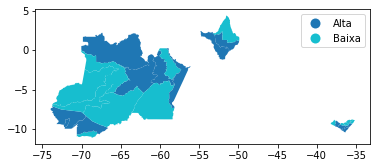

In [95]:
#Regioes de saúde por Faixa
geo.plot(column='Faixa', legend=True);
data

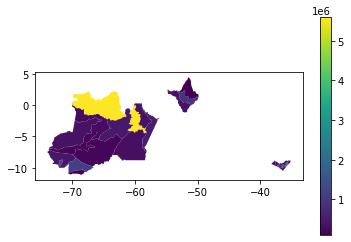

In [96]:
#Número de vacinas por cada região
geo.plot(column='count', legend=True);

Abaixo pode-se ver as cinco regiões com menos vacinados em cada faixa de vacinação. Entre os estados coletados, o Amazonas é o estado com a maior quantidade de regiões com baixa vacinação. Mesmo que seja o estado com o maior número de vacinas, por ser um estado muito grande, as vacinas estão sendo focadas em algumas regiões.

,code_health_region,Nome da Região de Saúde,UF,count,Faixa
4,13002,Rio Negro e Solimões,AM,457896,Alta
2,12003,Juruá e Tarauacá/Envira,AC,415253,Alta
19,27005,5ª Região de Saúde,AL,408863,Alta
20,27006,6ª Região de Saúde,AL,400125,Alta
14,16003,Área Sudoeste,AP,378395,Alta
16,27002,2ª Região de Saúde,AL,257041,Baixa
9,13007,Regional Juruá,AM,202094,Baixa
8,13006,Regional Purus,AM,182691,Baixa
0,12001,Alto Acre,AC,123084,Baixa
13,16002,Área Norte,AP,110485,Baixa


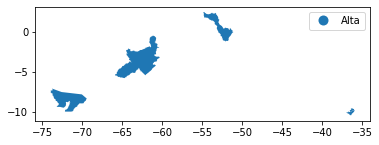

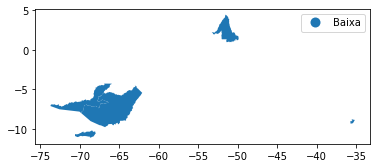

In [94]:
#Regioes com menos vacinas em cada faixa
state.merge(tabela).dropna().groupby('Faixa').plot(column='Faixa', legend=True);
tabela

In [93]:
#Total de Vacinas por Estado
data.groupby('UF').sum()['count']

UF
AC    1658620
AL    6609696
AM    8260200
AP    1429606
Name: count, dtype: int64

________________

### Conclusão

Neste projeto foram utilizadas várias bibliotecas para se encontrar formas eficientes de se utilizar o Python para baixar, carregar e manipular uma grande quantidade de dados.
- A biblioteca datatable, uma implementação do python que tenta duplicar a biblioteca data.table do R, é uma boa alternativa para se trabalhar com grandes dados, tendo uma boa eficiência de tempo e de memória.
- A biblioteca Pandas é uma biblioteca pesada e lenta, mas ao se utilizar o pyarrow como auxiliar, consegue-se melhorar bastante a performance dos processos.

### Referências

Documentação datatable:
https://datatable.readthedocs.io/en/latest/manual/comparison_with_pandas.html?highlight=pandas

Fast Python for Data Science - Tiago Rodrigues Antão. 2022 Manning Publications. (Livro) 